#### Home Assigment 2, CMPE 260, Spring 2022, SJSU.

**Question 1 (18 points of 33): MDP - exact solution in the tabular case**. In this question you will solve MDP by **Value Iteration** and **Policy Iteration** algorithms with a known dynamics and reward $T$ and $R$, respectively. 

## Theoretical part (3 points)
Show that the expected accumulated reward with the discounting factor $0\le \gamma < 1$ and constants rewards $\forall t  \; r_t=r$
$$V^{\pi}(s) = E_{p(\tau\mid s)}\Bigl[\sum_{t=1}^{\infty}\gamma^{t-1}r_t\Bigr]$$
is equal to $$\frac{r}{1 − γ}.$$

$$V^{\pi}(s) = E_{p(\tau\mid s)}\Bigl[\sum_{t=1}^{\infty}\gamma^{t-1}r_t\Bigr]$$
$$=  E_{p(\tau\mid s)}\Bigl[r_t+\gamma^{1}r_t+\gamma^{2}r_t+\gamma^{3}r_t ......  \Bigr]$$
$$=  E_{p(\tau\mid s)}\Bigl[r_t (1+\gamma^{1}+\gamma^{2}+\gamma^{3} ......)  \Bigr]$$
$$=  E_{p(\tau\mid s)}\Bigl[r_t \frac{1-\gamma^{n}}{1-\gamma}   \Bigr]$$ Using sum of geometric series formula
$$=  E_{p(\tau\mid s)}\Bigl[ \frac{r_t}{1-\gamma}   \Bigr]$$ as $\gamma^{n} = 0$ as $0\le \gamma < 1$



## Practical part (15 points)

import the necessary libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

As per the problem definition, we define the following variables:

In [3]:
GRID_SIZE = 15

START = (0, 0)
GOAL = (14, 14)

# Action Space
A = [
    (-1, 0),    # 'up'
    (1, 0),     # 'down'
    (0, -1),    # 'left'
    (0, 1),     # 'right'
    (0, 0)      # 'stay'
]

# State Space
S = np.zeros((GRID_SIZE, GRID_SIZE))

# Noise
ALPHA = [0.2, 0.8]

Define maze walls. 0 - no wall, 1 - horizontal wall no the bottom of the cell, 2 - vertical wall on the right of the cell

In [27]:
# horizontal walls
S[3, 0:12] = 1
S[5, 10: ] = 1
S[8, 3:12] = 1
S[11, 4: ] = 1
S[4,4]=1
# vertical walls
S[8:12, 2] = 2
S[4:7, 3] = 2

# goal state
S[GOAL]    = 3

Visualize the maze

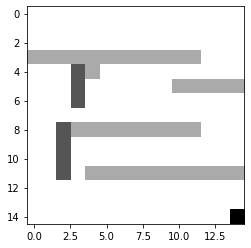

In [28]:
plt.imshow(S, cmap='binary')

We will define a utility function s_next_calc which computes the index of the next state given current state and action.

In [29]:
def s_next_calc(s, a):
    '''This function returns the agent's next state given action
    and current state (assuming the action succeeds).
    : param s: Current position of the agent
    : param a: action taken by the agent
    : returns: New state coordinates in the grid
    '''

    return (s[0] + A[a][0], s[1] + A[a][1])

In [30]:
#s_next_calc((0,0), 0)

A Utility function to check if the action at current state leads to a collision with a wall.

In [31]:
def hit_wall(curr, action):
    '''This function checks if the agent hits any walls.
    : param curr: Current position of the agent
    : param action: Chosen action by the agent
    : returns: True/False Binary value to indicate if agent hits a wall
    '''
    s_new = (
        curr[0] + A[action][0],
        curr[1] + A[action][1]
    )

    # Check for grid boundaries
    if min(s_new) < 0 or max(s_new) > GRID_SIZE-1:
        return True

    # Check walls
    # 0: 'up':   (-1,  0),
    # 1: 'down': ( 1,  0),
    # 2: 'left': ( 0, -1),
    # 3: 'right':( 0,  1),
    # 4: 'stay': ( 0,  0)
    if (S[curr]==1 and action==1) \
        or (S[curr]==2 and action==3) \
        or (S[s_new]==1 and action==0)\
        or (S[s_new]==2 and action==2):
        return True

    return False

In [32]:
hit_wall(START, 0)

True

Reward function.

In [33]:
def R(s, a):
    '''Reward function
    : param s: Current state of the agent
    : param a: Action the agent takes at the current state
    : returns: Reward for the action at current state
    '''
    if s == GOAL:
        return 1000
    elif hit_wall(s, a):
        return -100
    else:
        return -1

In [34]:
R((0,0),0)

-100

Calculate the transition probabilities to state s_next from current state s upon action a.

In [35]:
def Pr(s_next, s, a, alpha):
    '''This function returns probabilities for each action at agent's
    current state.
    :param s: Current state of the agent
    :param a: Action the agent takes at the current state
    :param alpha: Probability of the agent to take a random action instead of the action a
    :returns : Transition probability for the action at current state
    '''
    # can't move once reached the GOAL
    if s == GOAL:
        if s_next == s:
            return 1
        else:
            return 0

    # If wall hit, next state is current state
    if hit_wall(s, a):
        # Illegal action with s = s'
        if s_next == s:
            return 1
        # Illegal action with s != s'
        else:
            return 0

    # Legal action with adjacent s and s'
    if s_next == s_next_calc(s, a):
        return 1 - alpha
    else:
        # Agent moves to another adjacent state instead of s' due to noise in a
        # Generate all other neighbors of s by applying actions other than a
        other_s_next = [s_next_calc(s, i)
                    for i in range(len(A)) if i is not a]
        if s_next in other_s_next:
            return alpha/4
    return 0

In [36]:
START

(0, 0)

In [37]:
print(Pr((0,0),START,1,0.2))

0.05


In [38]:
ls_state  = [(s_next_calc(START, pos_action),pos_action)  if not hit_wall(START,pos_action) else (START,pos_action) for pos_action in range(len(A)) ]
ls_state

[((0, 0), 0), ((1, 0), 1), ((0, 0), 2), ((0, 1), 3), ((0, 0), 4)]

In [39]:
 # 0: 'up':   (-1,  0),
    # 1: 'down': ( 1,  0),
    # 2: 'left': ( 0, -1),
    # 3: 'right':( 0,  1),
    # 4: 'stay': ( 0,  0)

In [40]:
for i  in ls_state:
    print(i,Pr(i[0], START, i[1], 0.2))

((0, 0), 0) 1
((1, 0), 1) 0.8
((0, 0), 2) 1
((0, 1), 3) 0.8
((0, 0), 4) 0.8


In [41]:
print(Pr((0,0),(0,1),1,0.2))
print(Pr((0,1),(0,1),1,0.2))
print(Pr((1,1),(0,1),1,0.2))
print(Pr((0,2),(0,1),1,0.2))
print(Pr((2,1),START,1,0.2))


0.05
0.05
0.8
0.05
0


## Policy Iteration

In policy iteration, we define three functions:

* policy_evaluation
* policy_improvement
* policy_iteration

refer to slides starting from 151 for policy iteration and value iteration.

In [42]:
def get_expected_val(s,a,alpha,V):
    s_next_val=0
    for i in range(5):

        s_next=s_next_calc(s,i)
        if hit_wall(s,i):
            s_next_val+=Pr(s_next,s,a,alpha)*(R(s,i)+V[s])
                                              
        else:
            s_next_val+=Pr(s_next,s,a,alpha)*V[s_next]
    return s_next_val

In [43]:
def policy_evaluation(policy, S, Pr, alpha, ctr):
    V = np.zeros((GRID_SIZE, GRID_SIZE))
    for _ in range(ctr):
        for s, _ in np.ndenumerate(S):
            
            a = policy[s]
            
            V[s]=R(s,a)+ 0.9*get_expected_val(s,a,alpha,V)
             
    return V

In [44]:
def policy_improvement(V, S, A, Pr, alpha):
    policy = np.zeros((GRID_SIZE, GRID_SIZE), dtype=int)
    for s, _ in np.ndenumerate(S):
        Q = np.zeros(len(A))
        for a in range(len(A)):
            Q[a] = R(s,a)+ 0.9*get_expected_val(s,a,alpha,V)
            policy[s] = np.argmax(Q)
    return policy

In [45]:
def policy_iteration(S, A, Pr, alpha, n_iter, n_eval, plot=None):
    """
    :param list S: set of states
    :param list A: set of actions
    :param function Pr: transition function
    :param float alpha: discount factor
    :param int n_iter: number of iterations
    :param int n_eval: number of evaluations
    :param plot: list of iteration numbers to plot
    """
    plt.ion()
    policy = np.random.randint(0, len(A), (GRID_SIZE, GRID_SIZE))

    for _ in range(n_iter):
        V = policy_evaluation(policy, S, Pr, alpha, n_eval)
        policy = policy_improvement(V, S, A, Pr, alpha)
        # plot current value and optimal policy
        if plot and _+1 in plot:
            plot_value_grid(V, policy, msg='Policy iteration, alpha = {}, iteration = {}/{}'.format(alpha, _+1, n_iter))
    return V, policy

## Value Iteration

We use the following function for value iteration. See slides starting from 161.

In [46]:
def value_iteration(S, A, Pr, alpha, ctr=100, plot=None):
    """
    :param list S: set of states
    :param list A: set of actions
    :param function Pr: transition function
    :param float alpha: noise parameter
    """
    plt.ion()

    V = np.zeros((GRID_SIZE, GRID_SIZE))
    optimal_policy = np.random.randint(0, len(A), (GRID_SIZE, GRID_SIZE), dtype=int)
    for x in range(ctr):
        for s,_ in np.ndenumerate(S):
            Q = np.zeros(len(A))
            for a in range(len(A)):
                Q[a] = R(s,a)+ 0.9*get_expected_val(s,a,alpha,V)
            V[s] = np.max(Q)
            optimal_policy[s] = np.argmax(Q)

        # plot current value and optimal policy
        if plot and x+1 in plot:
            plot_value_grid(V, optimal_policy, msg='Value iteration, alpha = {}, iteration = {}'.format(alpha, x+1))
            plt.pause(0.1)
    return V, optimal_policy

We will use the following utility function to plot the grid with values from V.

In [47]:
def plot_value_grid(V, policy, msg=""):
    plt.figure(figsize=(5, 5), tight_layout=True)
    plt.title(msg)
    plt.imshow(V)
    quiver_action_dict = [
            [1, 0],
            [-1, 0],
            [0, -1],
            [0, 1],
            [0, 0]
    ]
    for k, a in np.ndenumerate(policy):
        plt.quiver(k[1], k[0],
                  quiver_action_dict[a][1], quiver_action_dict[a][0])
    plt.show()

## Tasks
### A. Find the optimal solution by two methods for $\alpha$ = 0.

#### I. Policy Iteration 

We are using iterative policy evaluation. Let's set the number of iterations for policy evaluation (k_max) as 50 and the number of iterations for policy iteration as 50 (it will take some time to run)

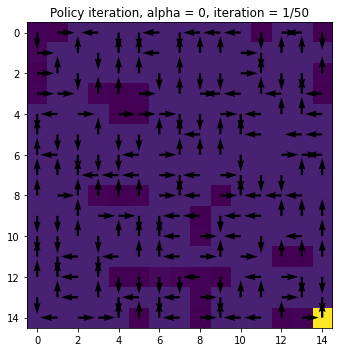

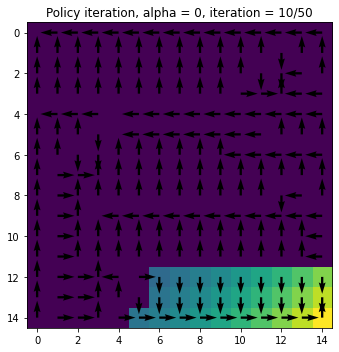

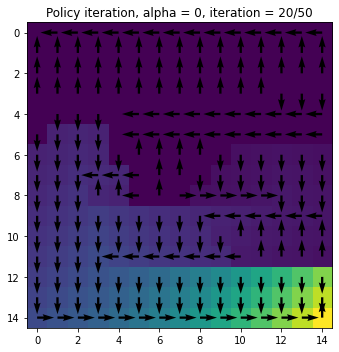

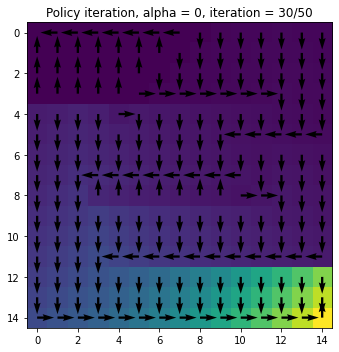

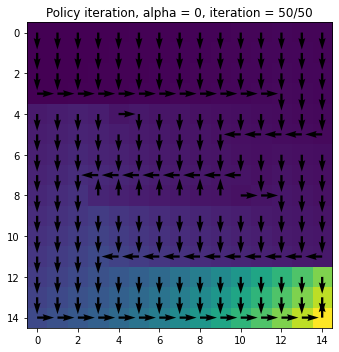

In [57]:
n_pol_iter = 50
n_pol_eval = 50
val2, pol2 = policy_iteration(S, A, Pr, alpha=0, n_iter=n_pol_iter, n_eval=n_pol_eval,plot=[1,10,20,30,50])

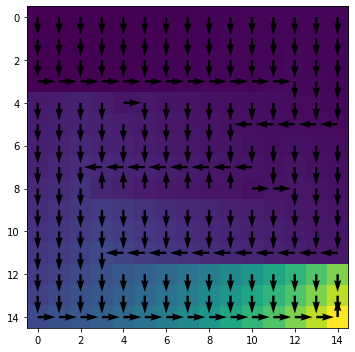

In [49]:
plot_value_grid(val2, pol2, msg="")

In [50]:
import pandas as pd
pd.DataFrame(val2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,35.720378,42.797098,50.660121,59.396812,69.104247,79.890286,91.874774,105.190871,119.986535,136.426162,154.692413,174.988249,197.539176,176.785259,158.106733
1,42.797098,50.660121,59.396812,69.104247,79.890286,91.874774,105.190871,119.986535,136.426162,154.692413,174.988249,197.539176,222.595763,199.336187,178.402568
2,50.660121,59.396812,69.104247,79.890286,91.874774,105.190871,119.986535,136.426162,154.692413,174.988249,197.539176,222.595763,250.436415,224.392773,200.953496
3,59.396812,69.104247,79.890286,91.874774,105.190871,119.986535,136.426162,154.692413,174.988249,197.539176,222.595763,250.436415,281.370472,252.233425,226.010083
4,736.924343,825.642354,924.217921,830.796129,599.183276,671.044864,602.940378,541.646340,486.481706,436.833536,392.150182,351.935164,315.741647,283.167483,253.850734
5,825.642354,924.217921,1033.746329,929.371696,835.434527,750.891074,674.801967,606.321770,544.689593,489.220634,439.298570,394.368713,353.931842,317.538658,284.784792
6,924.217921,1033.746329,1155.444560,1038.900104,934.010094,839.609085,754.648176,678.183358,609.365023,547.428520,491.685668,441.517101,493.904200,443.513780,398.162402
7,1033.746329,1155.444560,1290.664817,1160.598336,1043.538502,938.184652,843.366187,758.029568,681.226611,612.103950,549.893555,493.904200,552.112086,495.900878,445.310790
8,1155.444560,1290.664817,1440.909547,1043.538502,938.184652,843.366187,758.029568,681.226611,612.103950,549.893555,493.904200,552.112086,616.787516,554.108764,497.697888
9,1290.664817,1440.909547,1607.848136,1793.335457,1613.001911,1450.701720,1304.631548,1173.168393,1054.851554,948.366399,852.529759,766.276783,688.649105,618.784194,555.905775


In [51]:
pd.DataFrame(pol2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,3,3,3,3,3,3,3,3,3,3,3,3,1,1,1
4,1,1,1,1,3,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2
6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,1,1,1,2,2,2,2,2,2,2,2,1,1,1,1
8,1,1,1,0,0,0,0,0,0,0,3,3,1,1,1
9,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


#### II. Value Iteration

Run for 100 iterations and no noise
Plot the value function and the optimal policy every 20 iterations

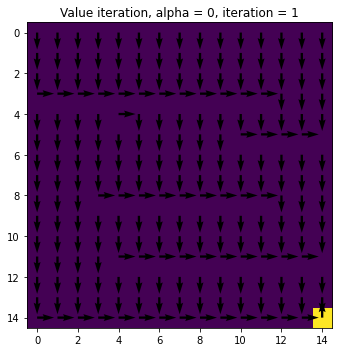

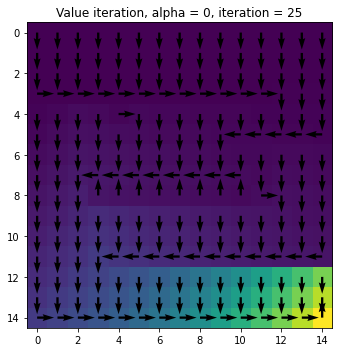

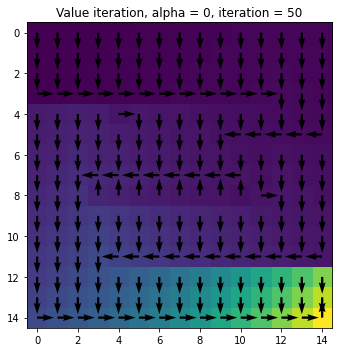

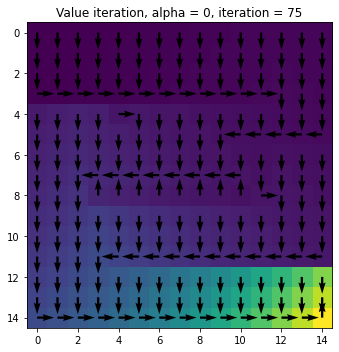

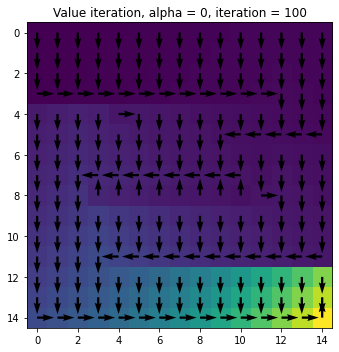

In [55]:
n_val_iter=100
val1, pol1 = value_iteration(S, A, Pr, alpha=0, ctr=n_val_iter, plot=[1, 25,75, 50, 100])

Let's visualize these results

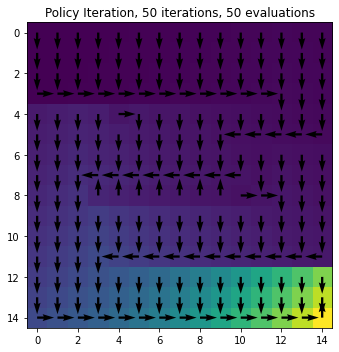

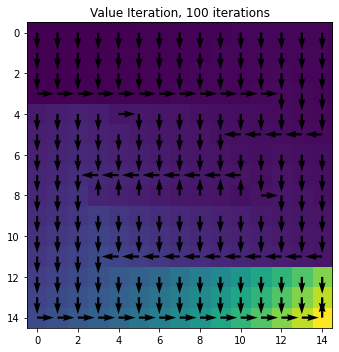

In [53]:
# Plot for policy iteration alpha = 0, k_max = 100, run for 100 iterations
plot_value_grid(val2, pol2, msg='Policy Iteration, {} iterations, {} evaluations'.format(n_pol_iter, n_pol_eval))
# Plot for value iteration alpha = 0, 100 iterations
plot_value_grid(val1, pol1, msg='Value Iteration, {} iterations'.format(n_val_iter))

### B. Repeat Value and Policy iteration for 10, 20 and 100 iterations with $\alpha \in \{0.2, 0.8\}$

#### I. Policy Iteration 

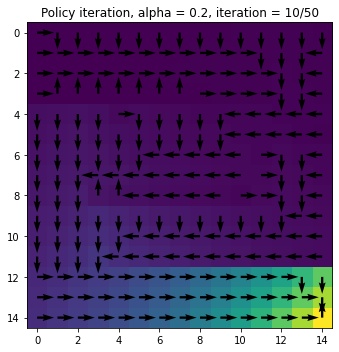

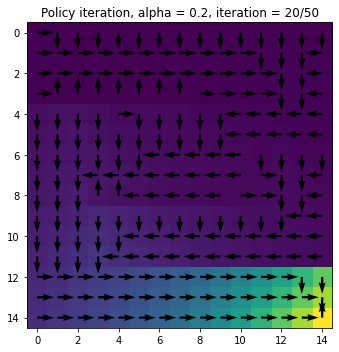

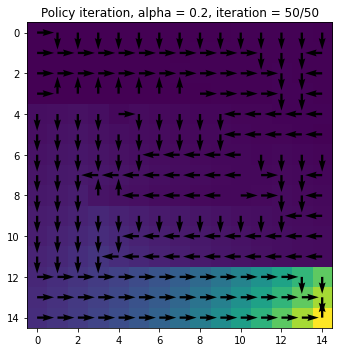

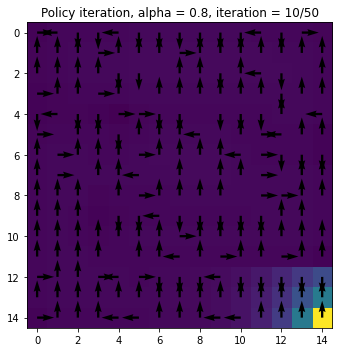

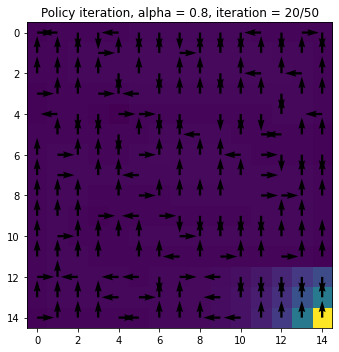

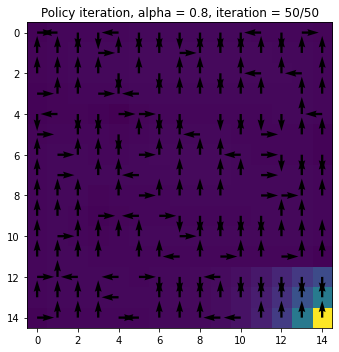

In [58]:

for idx1, alpha in enumerate(ALPHA):
    # for idx2, i in enumerate():
    val, pol = policy_iteration(S, A, Pr, alpha=alpha,
                                n_iter=50, n_eval=50, plot=[10, 20, 50])

#### II. Value Iteration

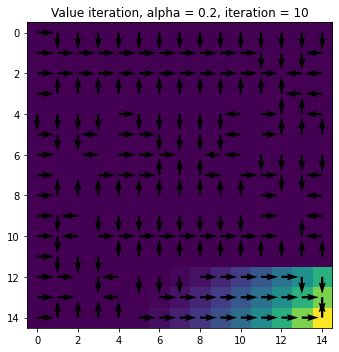

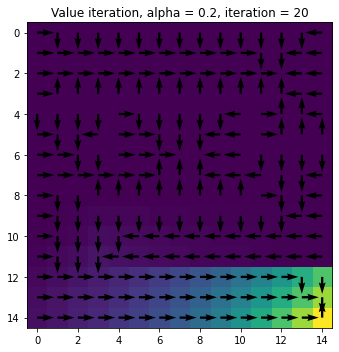

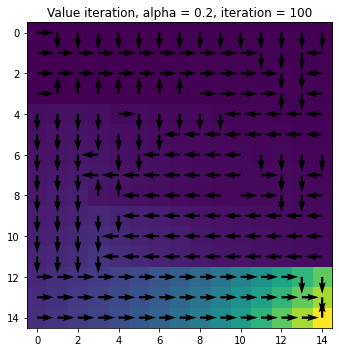

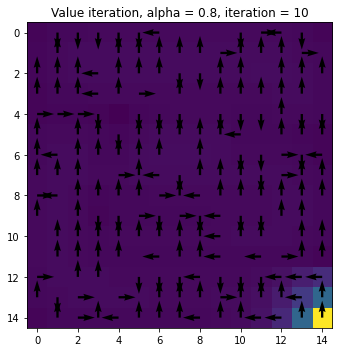

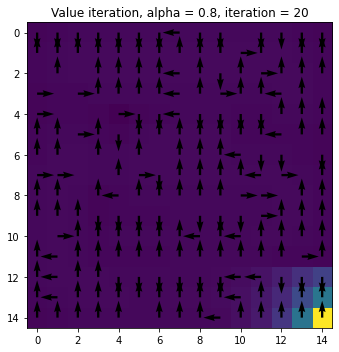

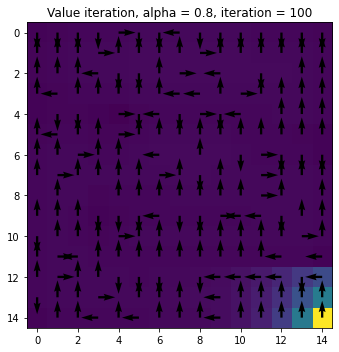

In [59]:
for idx1, alpha in enumerate(ALPHA):
    val, pol = value_iteration(S, A, Pr, alpha = alpha, ctr=100, plot=[10, 20, 100])

**Summarize briefly insights and your observations in Question 1.** 

    * Reward function play a huge role in both policy iteration and value iteration.
    * Agent's understanding based on the numerical calculation of utility /Value of the state. 
    * Noise plays a important factor as well.
    * Policy iteration might take more time to evaluate policy in the first few iteration.
    * Value Iteration is a greedy algorithm and acheives better result in few iterations.
    * If we have high noise value. Agent wont be able to come with good observation.